

# EDA PROCESS
NY Taxi Cab Trip Duration


## 1. Project Goals and Objectives
* Establish Goals and Objectives

## 2. Load the data and explore the dataset

* Load the relevant libraries and data set
* Explore the data and get the overview statistics, columns, info, na's, columns
* Generally, describe the variables (columns)
* Dataset statistics

## 3. Detailed Data Analysis

* Uni-variate analysis of the columns
* Bi-variate of some with respect to the target column trip_duration.
* Identified some outliers through these processes 

## 4. Reach Some Conclusions
* Reach some conclusion based on our EDA



# References


### dataset - NY Taxi Cab Duration Prediction

* Data is downloaded from Kaggle - https://www.kaggle.com/c/nyc-taxi-trip-duration/data


### References 
 * EDA - Exploratory Analyis  
https://medium.com/analytics-vidhya/exploratory-data-analysis-of-nyc-taxi-trip-duration-dataset-using-python-257fdef2749e

 * Linear Regression  
https://medium.com/analytics-vidhya/building-a-linear-regression-model-on-the-new-york-taxi-trip-duration-dataset-using-python-2857027c54f3


# 1. Project Goals





Problem stateent:

* BUSINESS GOAL - A typical taxi company faces a common problem of efficiently assigning the cabs to passengers so that the service is smooth and hassle free. One of main issue is determining the duration of the current trip so it can predict when the cab will be free for the next trip.
* TECHNICAL GOAL - build a regression model that estimates the duration of a taxi trip based on historic data
* This dataset and problem statement is taken from the Applied Machine Learning course by Analytics Vidhya 

Process:
1. EDA (this noteboook)
2. REGRESSION MODEL (next notebook) 
  1. Feature Extraction
    * Study Independent Variables for Predictability
    * Transform them - aggregate ...
  2. Regression Model (ML)
  3. Measure the model effectiveness1

# 2. Load and Explore the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [3]:
# before you begin provide your credentials to the runtime
#from google.colab import auth
#auth.authenticate_user()
#print('Authenticated')

#from google.cloud import bigquery
#project_id = 'alg-analytics-247823'
#client = bigquery.Client(project=project_id)

In [6]:
# https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c
#from google.colab import drive
#drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [4]:
# import the data
# look at the columns with df.head()

df_nyctaxi2016 = pd.read_csv('./nyc_taxi_train_2016.csv')
df_nyctaxi2016.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df_nyctaxi2016.shape

(1458644, 11)

In [6]:
# Sample 100K rows and create a new df
# note, we could have overwritten our original dataframe to save space
df=df_nyctaxi2016.copy()
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [7]:
df.shape

(1458644, 11)

In [8]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [9]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


### Generally Describe the variables
#### Demographic information of Customer & Vendor


* **id** a unique identifier for each trip
* **vendor_id**: a code indicating the provider associated with the trip record
* **passenger_count**: the number of passengers in the vehicle (driver entered value)

#### Information about the Trip

* **pickup_longitude**: date and time when the meter was engaged

* **pickup_latitude**: date and time when the meter was disengaged

* **dropoff_longitude**: the longitude where the meter was disengaged

* **dropoff_latitude**: the latitude where the meter was disengaged

* **store_and_fwd_flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

#### Dependent Variable
* **trip_duration**: (target) duration of the trip in seconds


#### Summary of Column Descriptions
* Thus we have a data set with 100K rows and 11 columns. There are 10 features and 1 target variable which is trip_duration

In [10]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

#### Get some dataset summary statistics

In [11]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


### Is the trip_duration distribution skewed to the left or right?

In [12]:
# is trip duration skewed left or right?
#   do most of the data points fall to the left or right of the median
median=df["trip_duration"].median()
print('median =', median)
df['trip_duration'][df['trip_duration']>median].count()

median = 662.0


729174

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [14]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

### Let's look at non-numerical columns using the count method 

by definition, these (non-numerical) columns pandas does not include in describe so we look at them separately.

In [15]:
non_num_cols=['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(df[non_num_cols].count())

id                    1458644
pickup_datetime       1458644
dropoff_datetime      1458644
store_and_fwd_flag    1458644
dtype: int64


## Boxplots 

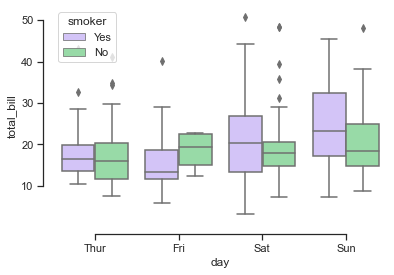

In [17]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

## So far we get some insights about the data:

* There are no numerical columns with missing data
* The passenger count varies between 1 and 9 with most people number of people being 1 or 2
* The trip duration varying from 1s to 1939736s~538 hrs. There are definitely some outliers present which must be treated.
* df.describe() and df.info() give us a sum of non-null data 
* There are no nulls, if tere were we would need to impute them - either take an average, median, or discard them

## Convert pickup and dropoff to datetime

The 2 columns **pickup_datetime** and **dropoff_datetime** are now converted to datetime format which makes analysis of date and time data much more easier.

# 3. Detailed Data Analysis


* 3.a Uni-variate analysis of the columns
* 3.b Bi-variate of some with respect to the target column trip_duration.

# 3.a Uni-variate analysis of the columns

Explore each variable independently

### Pasenger Count

Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.

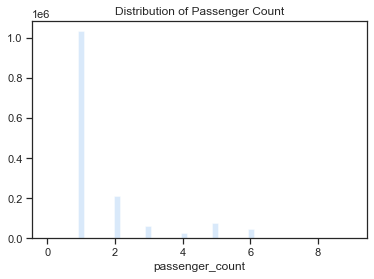

In [18]:
# plot a histogram. 
#  We just want to get a sense of the data shape
#  if KDE is True then Seaborn will try an do a Kernel Density Estimate 
#   to model the distribution that generated the histogram
#   overkill for this situation
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()



### Distribution of Pickup and Drop Off day of the week


Considering that there are a total of 100K rows
 This shows that there are many different pickup and drop off dates in these 2 columns.

So its better to convert these dates into days of the week so a pattern can be found.

In [19]:
print(df['pickup_datetime'].nunique())
print(df['dropoff_datetime'].nunique())

1380222
1380377


In [20]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

### Let's look at pickup and dropoff days

In [21]:
print(df['pickup_day'].value_counts())
print(df['dropoff_day'].value_counts())

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64
Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64


## Visualize distribution of pickup and dropoff day
Thus we see most trips were taken on Friday and Monday being the least. The distribution of trip duration with the days of the week is something to look into as well.

The distribution of days of the week can be seen graphically as well.

Text(0.5, 1.0, 'Number of dropoffs done on each day of the week')

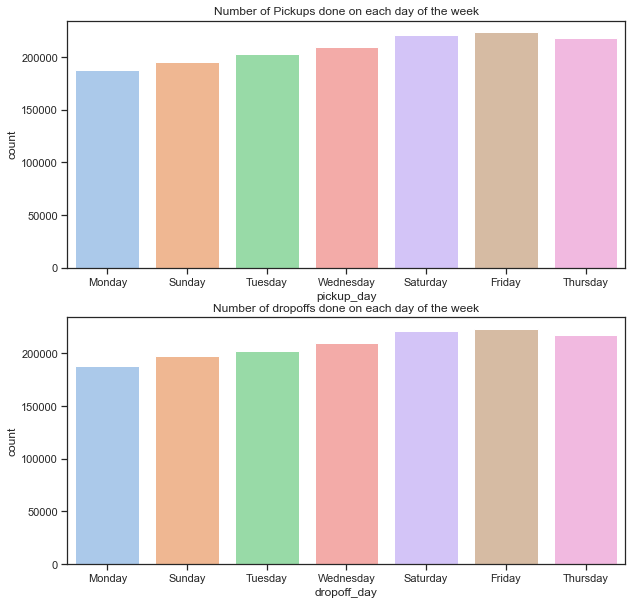

In [22]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))

sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')

sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')

#plt.tight_layout()

## Distribution of Pickup and Dropoff hours

The time part is represented by hours,minutes and seconds which is difficult for the analysis thus we divide the times into 4 time zones: morning (4 hrs to 10 hrs) , midday (10 hrs to 16 hrs) , evening (16 hrs to 22 hrs) and late night (22 hrs to 4 hrs)

In [23]:
def timewindow(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timewindow(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timewindow(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

## Lets look at the distribution of the timezones

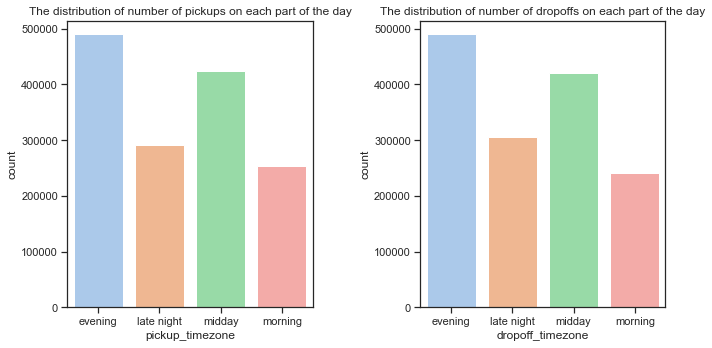

In [24]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))

sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')

sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])

ax[1].set_title('The distribution of number of dropoffs on each part of the day')

plt.tight_layout()

Thus we observe that most pickups and drops occur in the evening. While the least drops and pickups occur during morning.

Lets have another column depicting the hour of the day when the pickup was done

Text(0.5, 1.0, 'Distribution of dropoff hours')

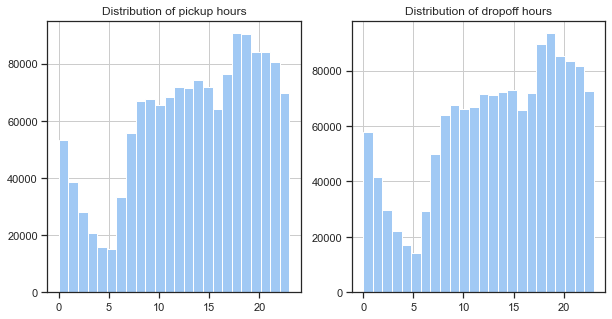

In [25]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
df['pickup_hour']=df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

The 2 distributions are almost similar and are also aligned with the division of the hours of the day into 4 parts and their distribution done previously.



## Distribution of the stored and forward flag

In [26]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

The number of N flag is much larger. We can later see whether they have any relation with the duration of the trip.

Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

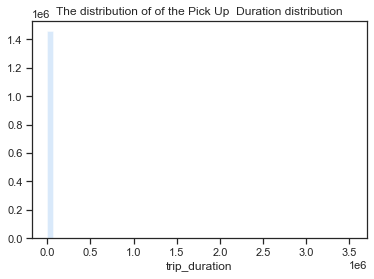

In [27]:
sns.distplot(df['trip_duration'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')

## Distribution of the Trip Duration

Text(0.5, 1.0, 'The distribution of Trip Duration distribution')

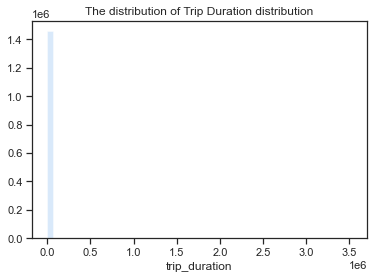

In [28]:
sns.distplot(df['trip_duration'],kde=False)
plt.title('The distribution of Trip Duration distribution')

According to the author "This histogram shows extreme right Skew"... not correct, contrary to the medium article! classic example of incorrect Data Science Communication!!!

* It is not extreme
* and it is not statistically significant.

In [29]:
# is trip duration skewed left or right?  ... 
#   do most of the data points fall to the left or right of the median
median=df["trip_duration"].median()
print('median =', median)
df['trip_duration'][df['trip_duration']>median].count()

median = 662.0


729174

### Box Plots

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

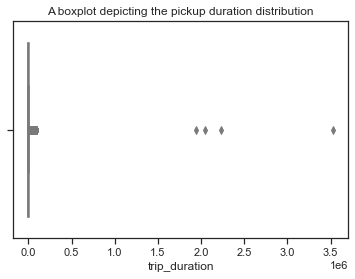

In [30]:
sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

Thus we see there is only value near 2000000 while all the others are somewhere between 0 and 100000. The one near 2000000 is definitely an outlier which must be treated.

Lets have a look at the 10 largest value of trip_duration.

In [31]:
print( df['trip_duration'].nlargest(10))

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
295382       86391
73816        86390
59891        86387
1360439      86385
753765       86379
Name: trip_duration, dtype: int64


The largest value is much greater than the 2nd and 3rd largest trip duration value. This might be because of some errors which typically occurs during data collection or this might be a legit data. Since the occurrence of such a huge value is unlikely so its better to drop this row before further analysis.

The value can be replaced by the mode or median of trip duration as well.

In [32]:
df=df[df.trip_duration < 86392]

Text(0.5, 1.0, 'Distribution of the pickup ditribution after the treatment of outliers')

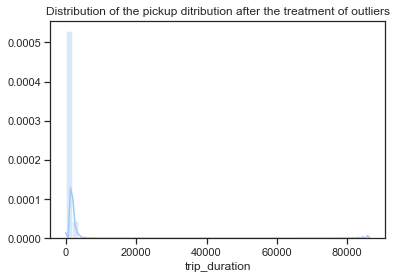

In [33]:
sns.distplot(df['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')

# notice this time we did not say KDE=False

Still there is an extreme right skewness. Thus we will divide the trip_duration column into some interval.

## The intervals are decided as follows:

  * less than 5 hours
  * 5–10 hours
  * 10–15 hours
  * 15–20 hours
  * more than 20 hours

In [34]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [0]:
## Distribution of pickup longitude and latitude

Text(0.5, 1.0, 'The distribution of Pick up Longitude')

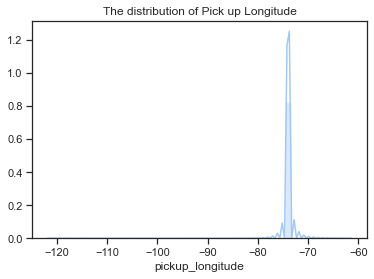

In [35]:
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')

Text(0.5, 1.0, 'The distribution of Pick up Latitude')

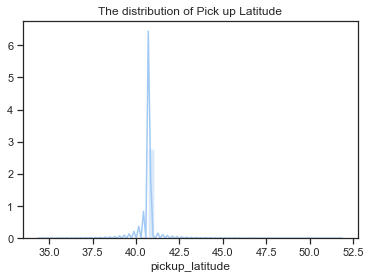

In [36]:
sns.distplot(df['pickup_latitude'])
plt.title('The distribution of Pick up Latitude')

In [0]:
## Distribution of drop-off longitude and latitude

Text(0.5, 1.0, 'The distribution of pick up Longitude')

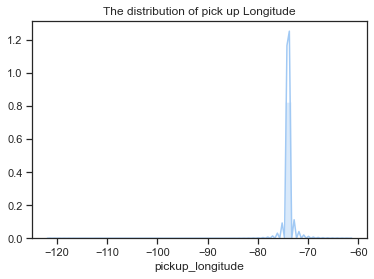

In [37]:
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of pick up Longitude')

Text(0.5, 1.0, 'The distribution of pick up Latitude')

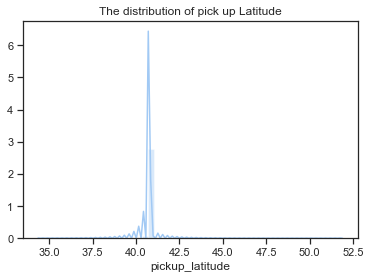

In [38]:
sns.distplot(df['pickup_latitude'])
plt.title('The distribution of pick up Latitude')

We see that the pickup longitude and the dropoff longitude resemble each other

while the pickup latitude and the dropoff latitude while different that longitude the latitude distributions resemble each other

## Distribution of vendor_id

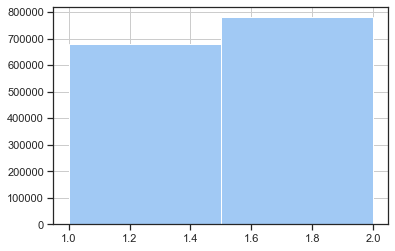

In [39]:
df['vendor_id'].hist(bins=2)

The distribution of vendor id is not much different as expected. ... two vendors

# 3.b Bivariate Analysis 

Relationship between the dependendent variable and the independent (target variable)

### Relationship beteen Trip Duration and Day of the Week

Text(0.5, 1.0, 'The Average Trip Duration per Dropoff Day of the week')

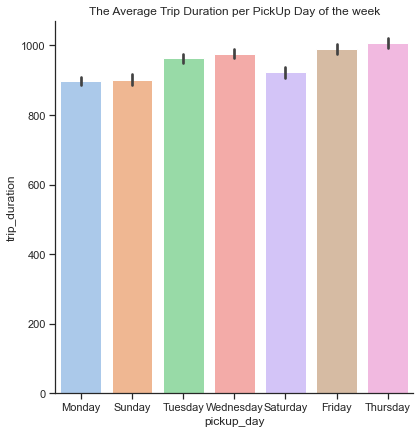

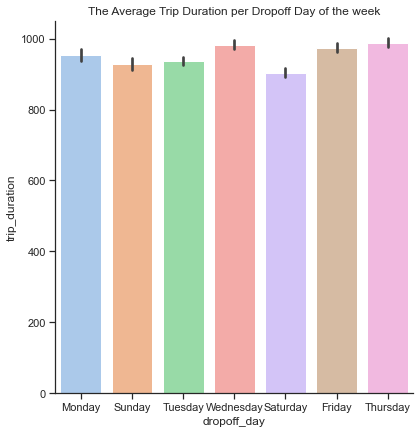

In [40]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)

plt.title('The Average Trip Duration per PickUp Day of the week')

sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)

plt.title('The Average Trip Duration per Dropoff Day of the week')

``
The graphs denote the average estimate of a trip for each day of the week. The error bars provides some indication of the uncertainty around that estimate
``

Thus the highest avg time taken to complete a trip is on Thursday while Monday, Saturday and Sunday takes the least time.

But this is not enough. We must also take into consideration the percentage of short, medium and long trips taken on each day

Text(0.5, 1.0, 'The Distribution of percentage of different duration of trips')

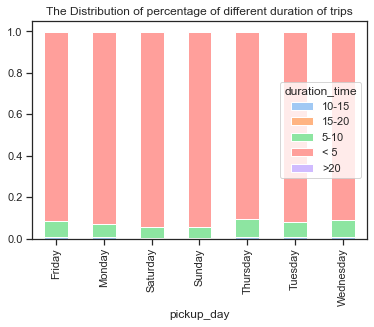

In [41]:
ax1=df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True')
plt.title('The Distribution of percentage of different duration of trips')

> The graph shows a percentage distribution of the trips of different duration within each day of the week.

This does not give much insights as the number of trips within 0–5 hours range is much larger for all the days,

Lets look at the percentage of only longer trips (with duration time > 5 hours)

Text(0.5, 1.0, 'A compared distribution of trips > 5 hours')

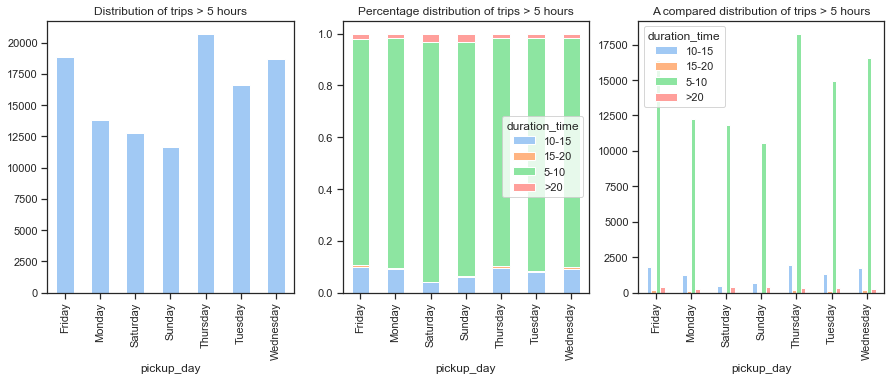

In [42]:
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))

ax1=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips > 5 hours')

ax2=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',ax=ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')

ax3=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')

The 3 graphs present 3 types of information here:

> The left most graph shows a frequency distribution of the number of trips(> 5 hours ) taken on each day of the week
>
> The middle one shows a percentage distribution of the trips of different duration ( > 5 hours )within each day of the week.
>
> The right one shows the frequency distribution of the trips of different duration (> 5 hours)within each day of the week.

Some key points:

* The most number trips which lasts > 5 hours were taken on Thursday followed by Friday and Wednesday.(Left graph)

* The most number of trips of duration 5–10, 10–15 was taken on Thursday.(right graph)

* But the highest percentage of trips longer than 20 hours was taken on Sunday and Saturday.(middle graph)

## The relationship between Trip Duration and time of the day

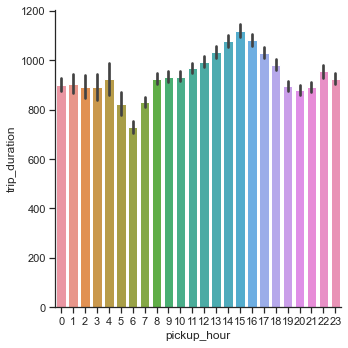

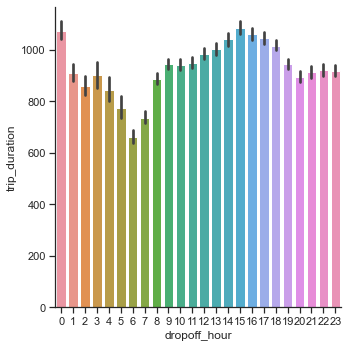

In [43]:


ax=sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=df)

ax=sns.catplot(x="dropoff_hour", y="trip_duration",kind="bar",data=df)

plt.show()

The highest average time taken to complete a trip are for trips started in midday(between 14 and 17 hours) and the least are the ones taken in the early morning(between 6–7 hours)

### The relationship between passenger count and duration

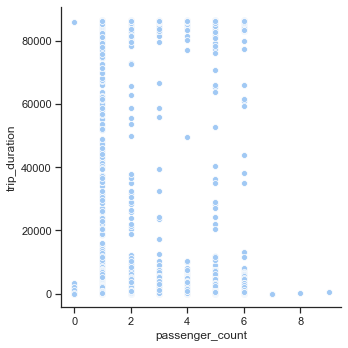

In [44]:
sns.relplot(x="passenger_count", y="trip_duration", data=df, kind="scatter")

Here we see, passenger count has no such relationship with trip duration. But it is noted that there are no long trips taken by higher passengers counts like 7 or 9. while the trip duration time is more or less evenly distributed only for passenger count 1.

## The relationship between vendor id and duration

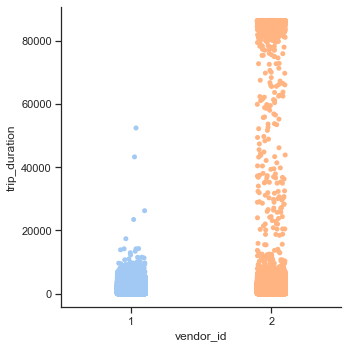

In [45]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=df)

Here we see that vendor 1 mostly provides short trip duration cabs while vendor 2 provides cab for both short and long trips


## The relationship between store forward flag and duration

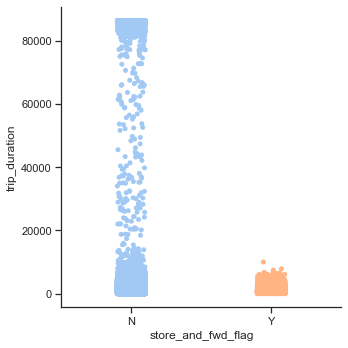

In [46]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=df)

Thus we see the flag was stored only for short duration trips and for long duration trips the flag was never stored.

### Boxplots

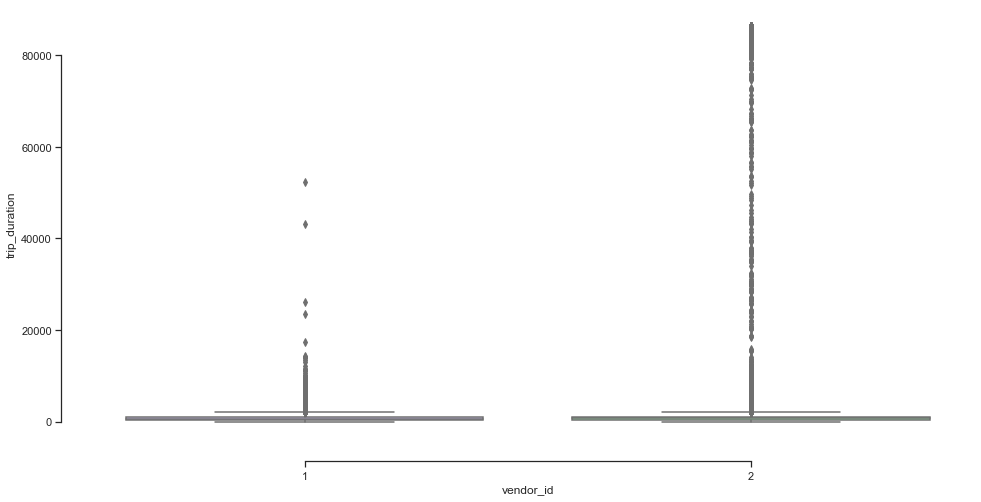

In [47]:
# Boxplot by vendor_id
fig, ax = plt.subplots(figsize=(16,8))
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

#palette=["m", "g"],
# Draw a nested boxplot to show bills by day and time
sns.boxplot(ax=ax, x="vendor_id", y="trip_duration", palette=["m", "g"], data=df)
sns.despine(offset=20, trim=True)

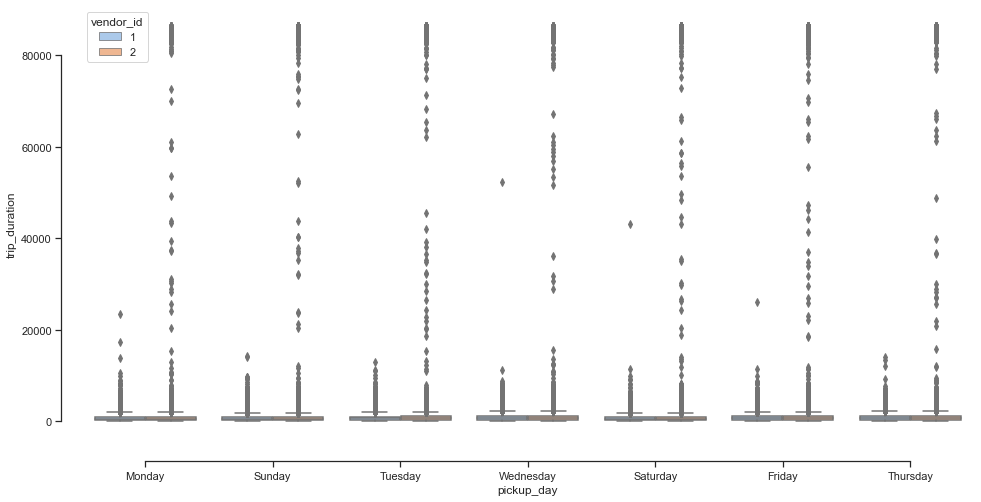

In [48]:
# add hue to the boxplot
fig, ax = plt.subplots(figsize=(16,8))
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
#tips = sns.load_dataset("tips")

#palette=["m", "g"],
# Draw a nested boxplot to show bills by day and time
sns.boxplot(ax=ax, x="pickup_day", y="trip_duration",  hue="vendor_id", data=df)
sns.despine(offset=20, trim=True)

### The relationship between geographical location and duration

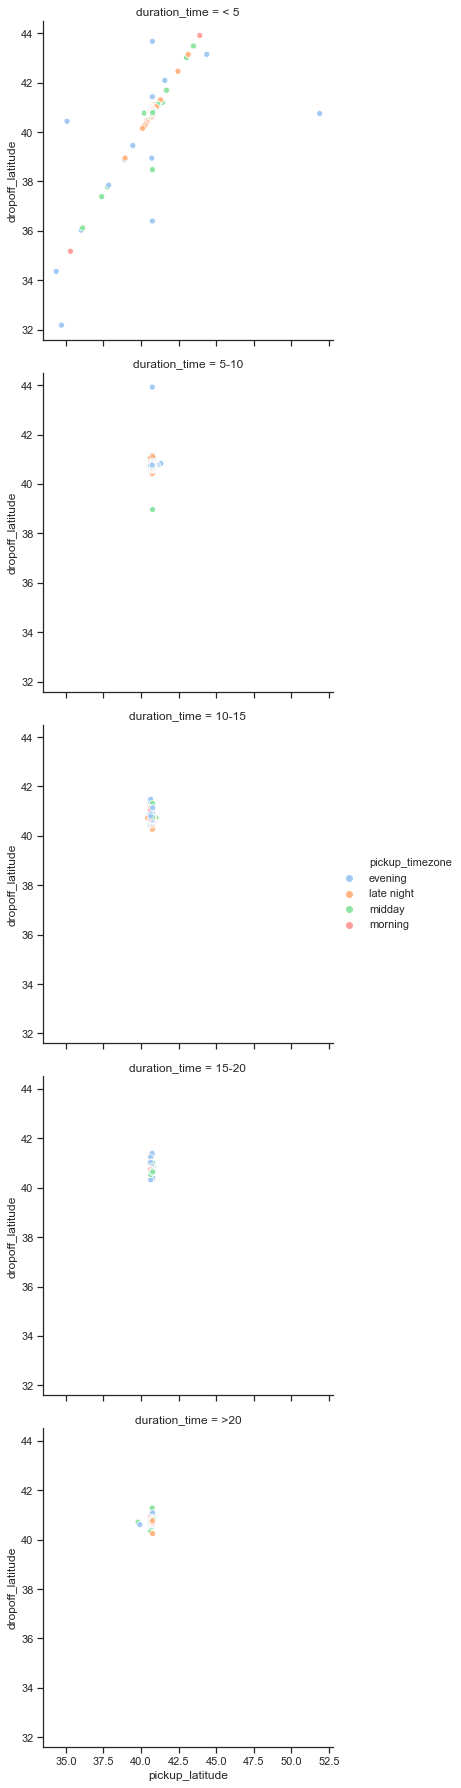

In [49]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',row='duration_time',data=df);

### Here’s what we see

* for shorter trips (<5 hours), the pickup and dropoff latitude is more or less evenly distributed between 30 ° and 40 °

* for longer trips(>5 hours ) the pickup and dropoff latitude is all concentrated between 40 ° and 42 ° degrees.

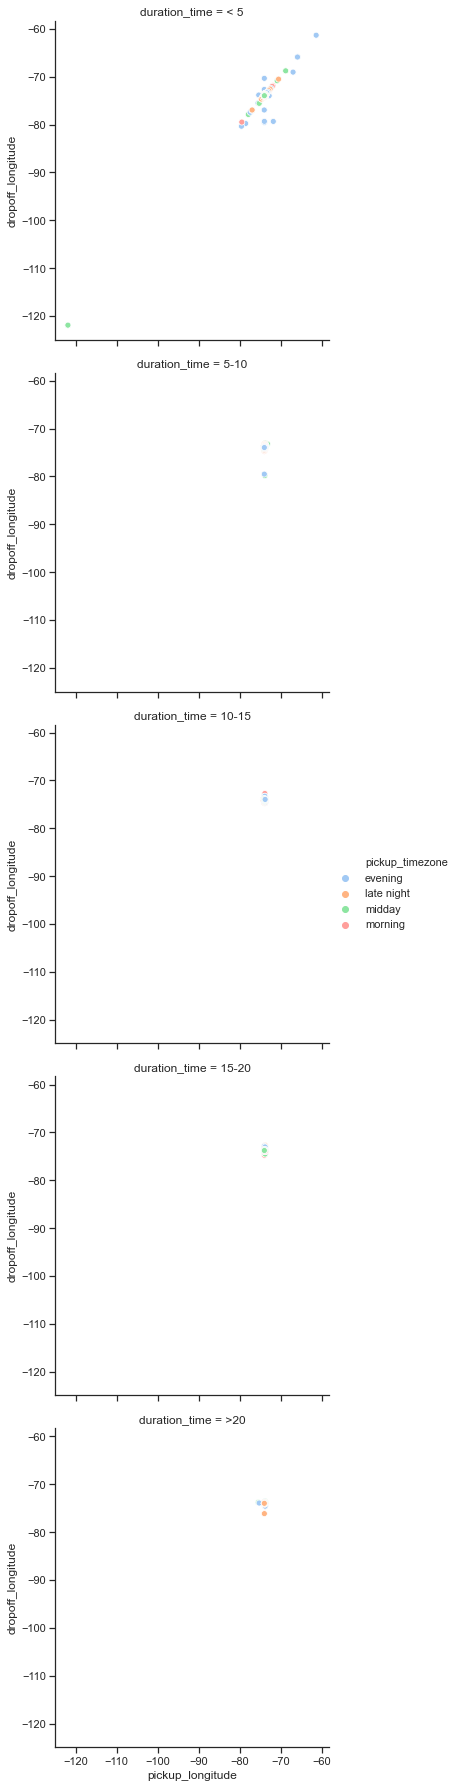

In [50]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude",hue='pickup_timezone',row='duration_time',data=df);

### Here’s what we see

* for shorter trips (<5), the pickup and dropoff longitude is more or less evenly distributed between -80 ° and -65 ° with one outlier near -120 °

* for longer trips(>5) the pickup and dropoff longitude is all concentrated near -75 °

# 4. Conclusions about Trip Duration and the Data Set



* Trip Duration varies a lot ranging from few seconds to more than 20 hours

* Most trips are taken on Friday , Saturday and Thursday

* The average duration of a trip is most on Thursday and Friday as trips longer than 5 hours are mostly taken in these days

* The average duration of trips started in between 14 hours and 17 hours is the largest.
    
* Vendor 2 mostly provides the longer trips

* The long duration trips(> 5 hours) are mostly concentrated with their pickup region near (40°, 75°) to (42°, 75°)